In [1]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as mat
import sklearn as sky

In [2]:
dataset=pan.read_csv('Data\grade.csv')
dataset.head()

,num,grade
0,42,4
1,74,2
2,30,4
3,87,1
4,97,1


In [3]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [4]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.20,random_state=20)

In [5]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(Xtrain,Ytrain)

LinearRegression()

In [6]:
Ypred=slr.predict(Xtest)
ypred1=[ int(x) for x in Ypred]

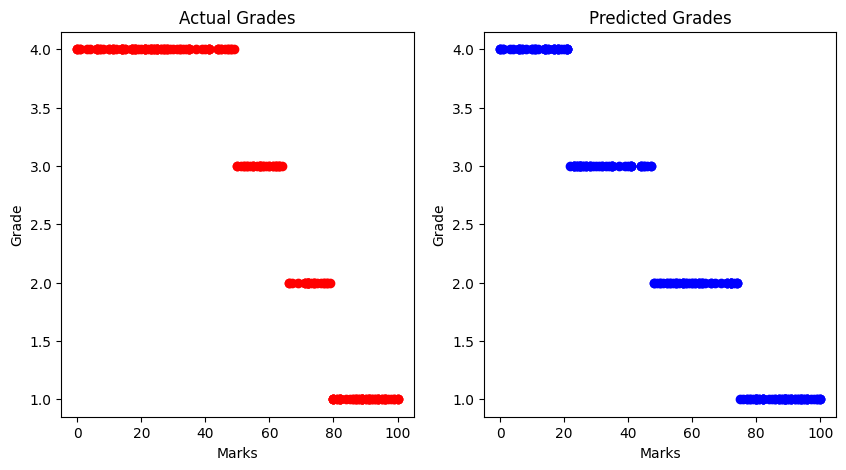

In [7]:
mat.figure(figsize=(10,5))
mat.subplot(1,2,1)
mat.scatter(Xtest,Ytest,color='red')
mat.title('Actual Grades')
mat.xlabel('Marks')
mat.ylabel('Grade')
mat.subplot(1,2,2)
mat.scatter(Xtest,ypred1,color='blue')
mat.title('Predicted Grades')
mat.xlabel('Marks')
mat.ylabel('Grade')
mat.show()

In [8]:
slr.predict([[45]])

c:\Users\navee\OneDrive\Desktop\Mad-Lab\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.10534075])

In [9]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(Xtrain,Ytrain)

LogisticRegression()

In [10]:
logr.predict([[45]])

c:\Users\navee\OneDrive\Desktop\Mad-Lab\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [11]:
Ypred=logr.predict(Xtest)
ypred2=[ int(x) for x in Ypred]

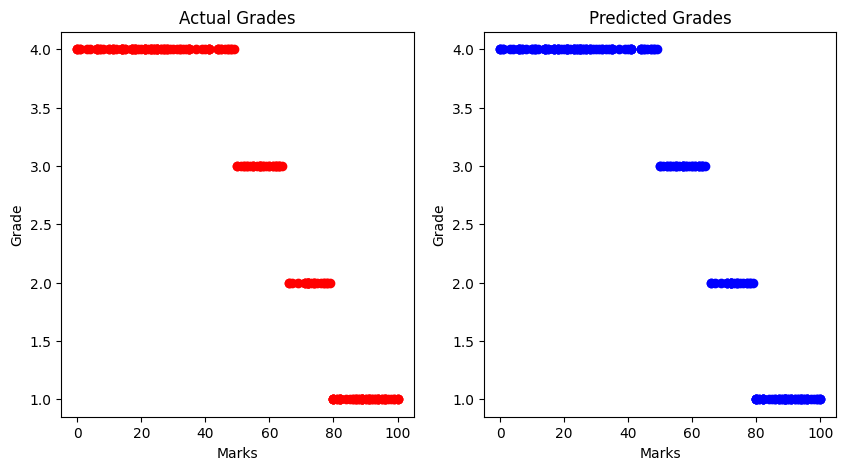

In [12]:
mat.figure(figsize=(10,5))
mat.subplot(1,2,1)
mat.scatter(Xtest,Ytest,color='red')
mat.title('Actual Grades')
mat.xlabel('Marks')
mat.ylabel('Grade')
mat.subplot(1,2,2)
mat.scatter(Xtest,ypred2,color='blue')
mat.title('Predicted Grades')
mat.xlabel('Marks')
mat.ylabel('Grade')
mat.show()

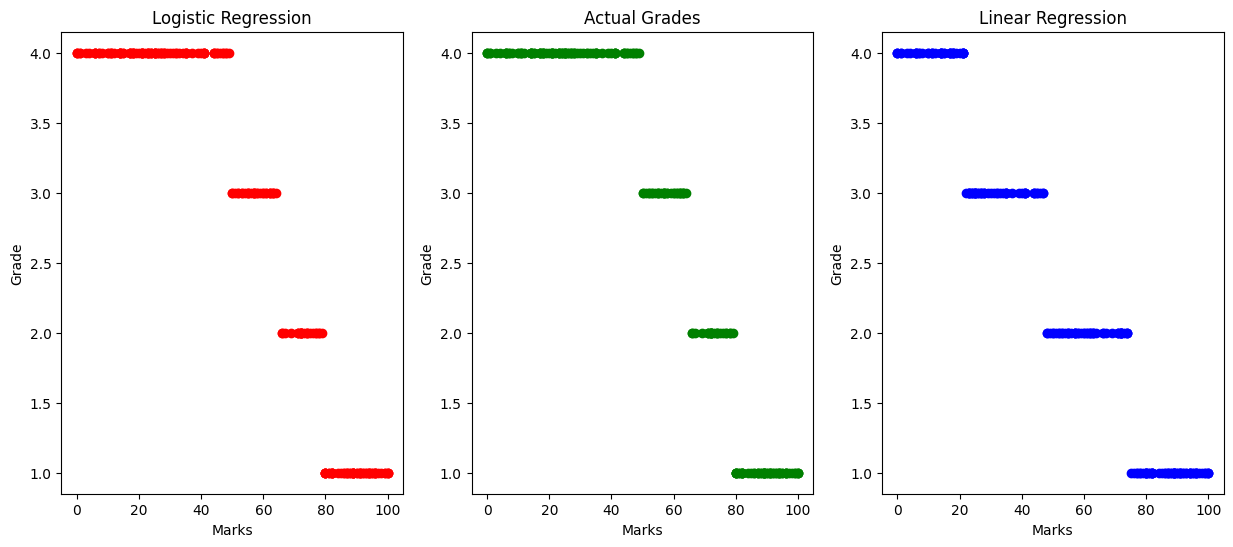

In [13]:
mat.figure(figsize=(15,6))
mat.subplot(1,3,1)
mat.scatter(Xtest,ypred2,color='red')
mat.title('Logistic Regression')
mat.xlabel('Marks')
mat.ylabel('Grade')
mat.subplot(1,3,2)
mat.scatter(Xtest,Ytest,color='green')
mat.title('Actual Grades')
mat.xlabel('Marks')
mat.ylabel('Grade')
mat.subplot(1,3,3)
mat.scatter(Xtest,ypred1,color='blue')
mat.title('Linear Regression')
mat.xlabel('Marks')
mat.ylabel('Grade')
mat.show()

In [14]:
from sklearn.metrics import mean_squared_error
x=mean_squared_error(Ytest,ypred1)
n=mean_squared_error(Ytest,ypred2)
x,n

(0.48, 0.0)

In [15]:
from sklearn.metrics import mean_absolute_error
x=mean_absolute_error(Ytest,ypred1)
n=mean_absolute_error(Ytest,ypred2)
x,n

(0.45, 0.0)

In [16]:
x=np.sqrt(mean_squared_error(Ytest,ypred1))
n=np.sqrt(mean_squared_error(Ytest,ypred2))
x,n

(0.6928203230275509, 0.0)

In [17]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(Ytest,ypred1)
cm2= confusion_matrix(Ytest,ypred2)
print(cm1)
print(cm2)


[[54  0  0  0]
 [ 7 17  0  0]
 [ 0 30  0  0]
 [ 0  3 47 42]]
[[54  0  0  0]
 [ 0 24  0  0]
 [ 0  0 30  0]
 [ 0  0  0 92]]


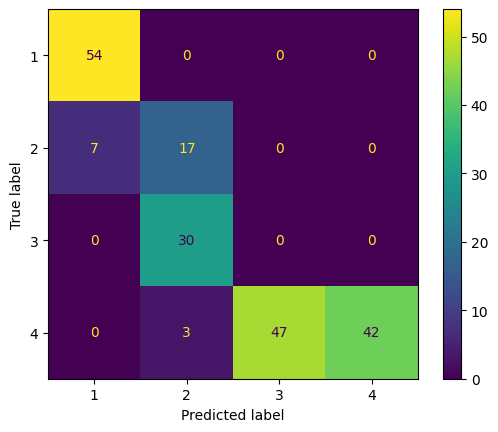

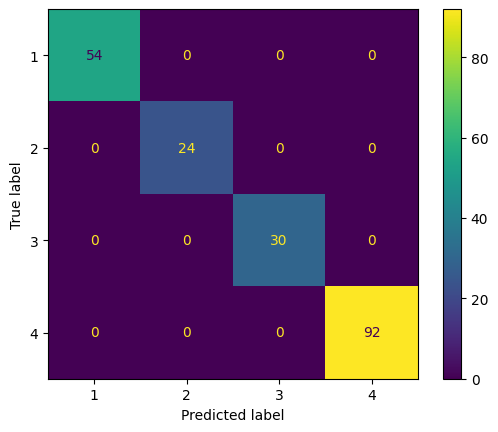

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[1,2,3,4])
cm_display.plot()
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =[1,2,3,4])
cm_display.plot()
mat.show()

In [19]:
from sklearn.metrics import roc_curve
fp,tp,threshold=roc_curve(Ytest,ypred1,pos_label=1)

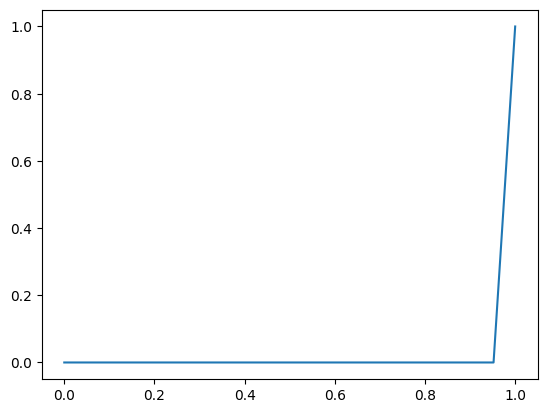

In [20]:
mat.plot(fp,tp)
mat.show()